In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.special import factorial

In [2]:
data = np.array([3, 2, 0, 1, 4, 5, 2])

In [3]:
def loglikelihoodpoisson(rate, data):
    return -1*len(data)*rate + (sum(data)*np.log(rate)) - sum(np.log(factorial(data)))

In [4]:
lambdas = np.linspace(0.5, 5, 200)
likelihoodvalues = [loglikelihoodpoisson(i, data) for i in lambdas]

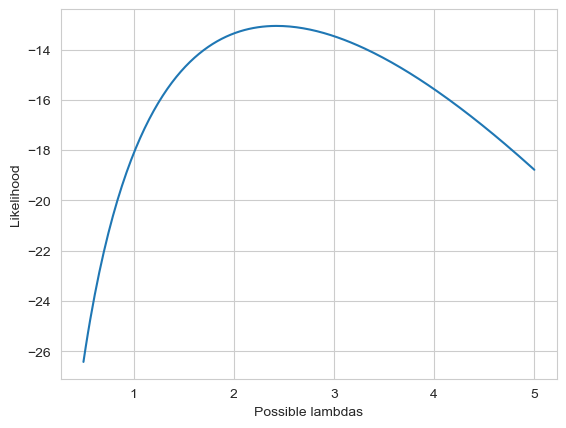

In [5]:
sns.set_style("whitegrid")
plt.plot(lambdas, likelihoodvalues)
plt.xlabel("Possible lambdas")
plt.ylabel("Likelihood")
plt.show()

In [6]:
#Find MLE by minimizing the negative log-likelihood
negloglikelihoodpoisson = lambda i: -loglikelihoodpoisson(i, data)
MLE = minimize(negloglikelihoodpoisson, x0 = 1, bounds = [(0, None)]) #strictly positive
print(MLE.x[0])

2.428571279488091


In [7]:
#verify with sample mean
def verifyMLE(data):
    return (sum(data)/len(data))
print(verifyMLE(data))

2.4285714285714284
